<B> Core Components: 

* Fiftyone library
* Fiftyone App
* FiftyOne Brain 
* Dataset / Model Zoo
* Plugins


Data model

* Dataset
* Sample
* View
* ViewStage
* Field
* Label
* Tag
* Metadata
* Aggregation

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz


<B> List or load zoo models and datasets




In [2]:
list_zoo_datasets_detection = foz.list_zoo_datasets('detection')
print(list_zoo_datasets_detection)

['coco-2014', 'coco-2017', 'kitti', 'kitti-multiview', 'open-images-v6', 'open-images-v7', 'sama-coco', 'voc-2007', 'voc-2012']


In [3]:
foz.list_zoo_models("detection")

['centernet-hg104-1024-coco-tf2',
 'centernet-hg104-512-coco-tf2',
 'centernet-mobilenet-v2-fpn-512-coco-tf2',
 'centernet-resnet101-v1-fpn-512-coco-tf2',
 'centernet-resnet50-v1-fpn-512-coco-tf2',
 'centernet-resnet50-v2-512-coco-tf2',
 'efficientdet-d0-512-coco-tf2',
 'efficientdet-d0-coco-tf1',
 'efficientdet-d1-640-coco-tf2',
 'efficientdet-d1-coco-tf1',
 'efficientdet-d2-768-coco-tf2',
 'efficientdet-d2-coco-tf1',
 'efficientdet-d3-896-coco-tf2',
 'efficientdet-d3-coco-tf1',
 'efficientdet-d4-1024-coco-tf2',
 'efficientdet-d4-coco-tf1',
 'efficientdet-d5-1280-coco-tf2',
 'efficientdet-d5-coco-tf1',
 'efficientdet-d6-1280-coco-tf2',
 'efficientdet-d6-coco-tf1',
 'efficientdet-d7-1536-coco-tf2',
 'faster-rcnn-inception-resnet-atrous-v2-coco-tf',
 'faster-rcnn-inception-resnet-atrous-v2-lowproposals-coco-tf',
 'faster-rcnn-inception-v2-coco-tf',
 'faster-rcnn-nas-coco-tf',
 'faster-rcnn-nas-lowproposals-coco-tf',
 'faster-rcnn-resnet101-coco-tf',
 'faster-rcnn-resnet101-lowproposals-

In [4]:
foz.list_downloaded_zoo_models()

{'mobilenet-v2-imagenet-torch': ('/home/borisef/fiftyone/__models__/mobilenet_v2-b0353104.pth',
  <fiftyone.zoo.models.ZooModel at 0x7f481456bb50>),
 'clip-vit-base32-torch': ('/home/borisef/fiftyone/__models__/CLIP-ViT-B-32.pt',
  <fiftyone.zoo.models.ZooModel at 0x7f481454ee50>)}

In [11]:
dataset = foz.load_zoo_dataset('quickstart')

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


<B> ____________________________

<B> APPs and SESSIONS

In [7]:
session1 = fo.launch_app(dataset, auto=False, desktop=False)

Session launched. Run `session.show()` to open the App in a cell output.



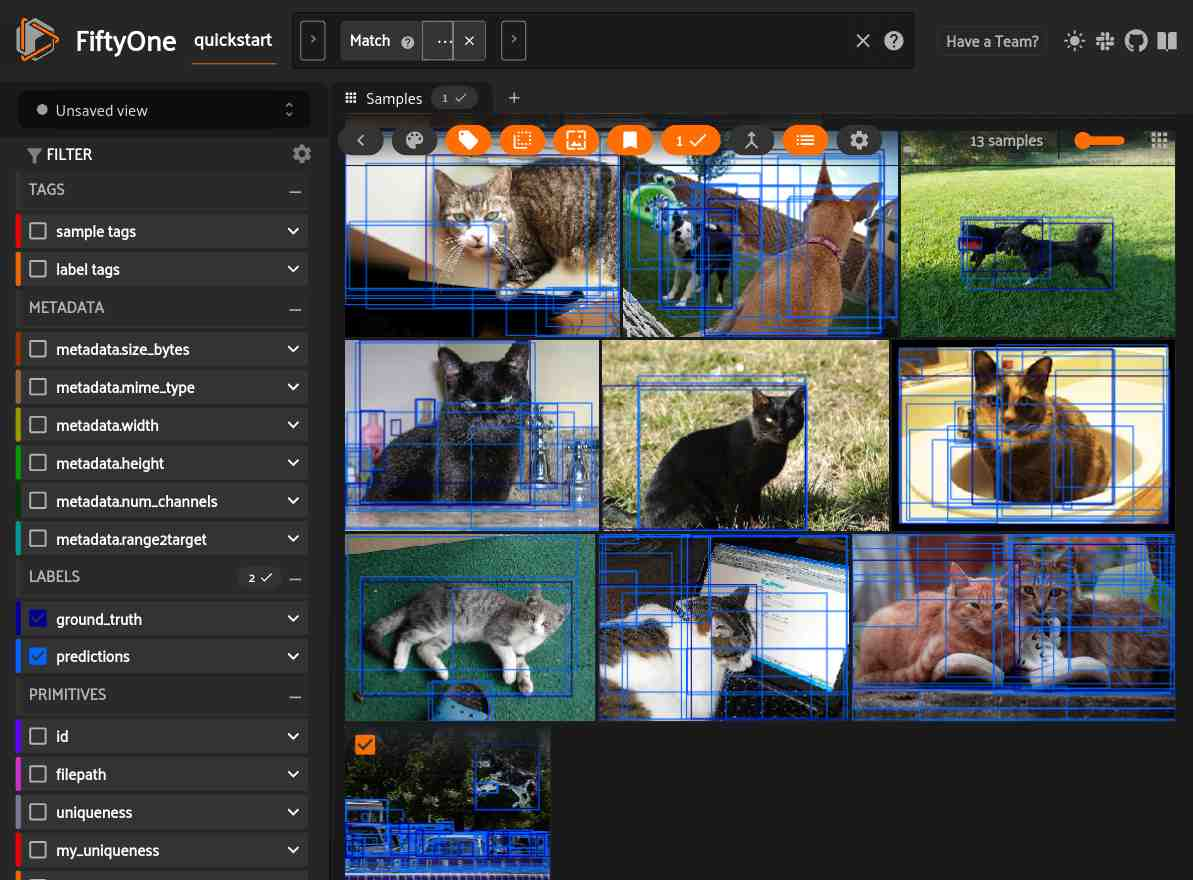

In [45]:
session1.show()

In [12]:
session1.freeze() # freezing app in notebook

<B> Let's Add some interesting stuff

In [13]:
import fiftyone.brain as fob

In [14]:
fob.compute_uniqueness(dataset, uniqueness_field="my_uniqueness")

Computing embeddings...


/home/borisef/Envs/fo_python38/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


 100% |█████████████████| 200/200 [889.0ms elapsed, 0s remaining, 225.0 samples/s]      
Computing uniqueness...
Uniqueness computation complete


In [15]:
fob.compute_exact_duplicates?

Signature: fob.compute_exact_duplicates(samples, num_workers=None, skip_failures=True)
Docstring:
Detects duplicate media in a sample collection.

This method detects exact duplicates with the same filehash. Use
:meth:`compute_similarity` to detect near-duplicate images.

If duplicates are found, the first instance in ``samples`` will be the key
in the returned dictionary, while the subsequent duplicates will be the
values in the corresponding list.

Args:
    samples: a :class:`fiftyone.core.collections.SampleCollection`
    num_workers (None): an optional number of processes to use
    skip_failures (True): whether to gracefully ignore samples whose
        filehash cannot be computed

Returns:
    a dictionary mapping IDs of samples with exact duplicates to lists of
    IDs of the duplicates for the corresponding sample
File:      ~/Envs/fo_python38/lib/python3.8/site-packages/fiftyone/brain/__init__.py
Type:      function

In [17]:
fob.compute_similarity(dataset,brain_key = "sim1") # TODO: EXPLORE

Computing embeddings...
 100% |█████████████████| 200/200 [13.2s elapsed, 0s remaining, 15.8 samples/s]      


In [18]:
# Image embeddings. Run this. See results in App
fob.compute_visualization(dataset, brain_key="img_viz")

Computing embeddings...
 100% |█████████████████| 200/200 [13.4s elapsed, 0s remaining, 15.8 samples/s]      
Generating visualization...
UMAP( verbose=True)
Wed Dec  6 10:54:14 2023 Construct fuzzy simplicial set
Wed Dec  6 10:54:14 2023 Finding Nearest Neighbors
Wed Dec  6 10:54:16 2023 Finished Nearest Neighbor Search
Wed Dec  6 10:54:18 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec  6 10:54:19 2023 Finished embedding


In [19]:
# Object patch embeddings
fob.compute_visualization(
    dataset, patches_field="predictions", brain_key="prediction_bb_viz"
)

Computing patch embeddings...
 100% |█████████████████| 200/200 [6.0m elapsed, 0s remaining, 0.7 samples/s]    
Generating visualization...
UMAP( verbose=True)
Wed Dec  6 11:00:26 2023 Construct fuzzy simplicial set
Wed Dec  6 11:00:26 2023 Finding Nearest Neighbors
Wed Dec  6 11:00:26 2023 Building RP forest with 9 trees
Wed Dec  6 11:00:29 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Wed Dec  6 11:00:38 2023 Finished Nearest Neighbor Search
Wed Dec  6 11:00:38 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec  6 11:00:43 2023 Finished embedding


In [20]:
# Compute metadata so we can reference image height/width in our view
dataset.compute_metadata()

In [39]:
v = list(dataset.view())
v[0]

<SampleView: {
    'id': '6565a8f33cb18decd840b3ef',
    'media_type': 'image',
    'filepath': '/home/borisef/fiftyone/quickstart/data/000880.jpg',
    'tags': ['validation'],
    'metadata': <ImageMetadata: {
        'size_bytes': 225193,
        'mime_type': 'image/jpeg',
        'width': 640,
        'height': 480,
        'num_channels': 3,
        'range2target': 262,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '5f452471ef00e6374aac53c8',
                'attributes': {},
                'tags': [],
                'label': 'bird',
                'bounding_box': [0.21084375, 0.0034375, 0.46190625, 0.9442083333333334],
                'mask': None,
                'confidence': None,
                'index': None,
                'area': 73790.37944999996,
                'iscrowd': 0.0,
                'eval': 'tp',
                'eval_id': '5f452c60ef00e6374aad9394',
                'eval_iou': 0.857506318

In [42]:
for sample in dataset.view():
    for d in sample['ground_truth']['detections']:
        d["bb_max_side"] = max(d['bounding_box'][2],d['bounding_box'][3])
        d["bb_max_side_pixel"] = max(d['bounding_box'][2]*sample['metadata']['height'],d['bounding_box'][3]*sample['metadata']['width'])
    sample.save()

In [43]:
#lets add pseudo metadata 
import random 
for sample in dataset.view():
    sample['metadata']['range2target'] = random.randint(10,1000)
    sample.save()

dataset.add_dynamic_sample_fields()

<B> -------------------------------------------------------

<B> In this dataset we already have GT and predictions, lets do <b> EVALUATION </b> 

In [46]:
#evaluate only predictions with high confidence
from fiftyone import ViewField as F
high_conf_view = dataset.filter_labels("predictions", F("confidence") > 0.75, only_matches=False)


In [47]:
eval_results = fo.evaluate_detections(dataset,pred_field="predictions",gt_field = "ground_truth",eval_key = 'eval',method=None,classwise=True)

Evaluating detections...
 100% |█████████████████| 200/200 [14.8s elapsed, 0s remaining, 9.3 samples/s]       


In [48]:
eval_results.print_report()

                precision    recall  f1-score   support

      airplane       0.36      0.83      0.50        24
         apple       0.07      1.00      0.13         2
      backpack       0.09      0.86      0.16         7
        banana       0.04      1.00      0.08         3
baseball glove       0.38      0.75      0.50         4
          bear       0.42      0.83      0.56         6
           bed       0.05      1.00      0.09         1
         bench       0.17      0.52      0.26        23
       bicycle       0.00      0.00      0.00         0
          bird       0.65      0.78      0.71       110
          boat       0.09      0.46      0.16        37
          book       0.07      0.91      0.13        11
        bottle       0.10      0.90      0.18        10
          bowl       0.16      0.93      0.28        15
      broccoli       0.10      1.00      0.19        16
           bus       0.06      1.00      0.12         1
          cake       0.11      0.75      0.19  

In [49]:
# The top-10 most common classes
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

In [50]:
#PLOTS
cm = eval_results.plot_confusion_matrix(classes=classes)

In [51]:
session1.plots.attach(cm) # only jupyter

In [56]:
cm.show() #won't work in pycharm

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'selectedpoints': [],
              'type': 'scatter',
              'uid': '21d05b71-d039-4dde-ad43-c71e1b3fe6fb',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
                           7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
                           3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
                          10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
                           2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
                           9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
                          


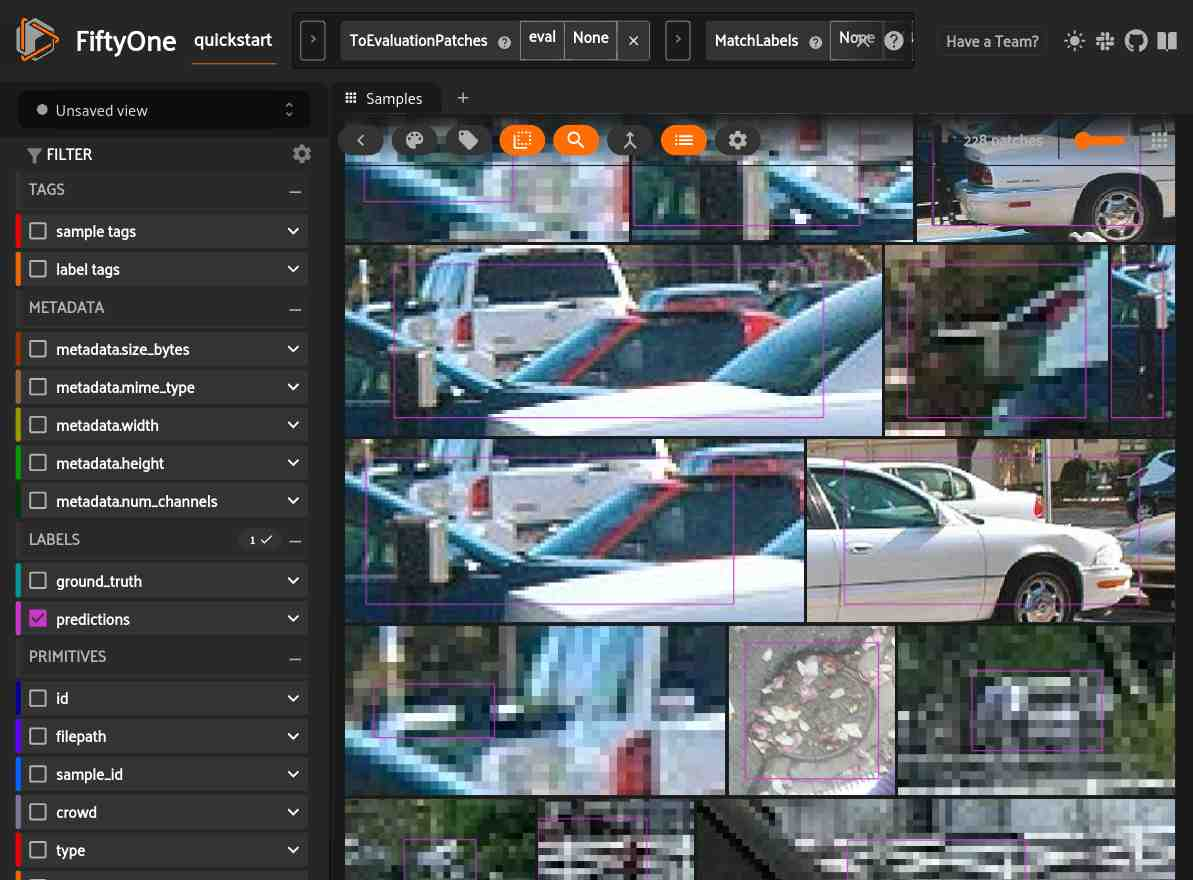

In [55]:
session1.show()

In [57]:
# Performs an IoU sweep so that mAP and PR curves can be computed
results = dataset.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    compute_mAP=True,
)

Evaluating detections...
 100% |█████████████████| 200/200 [3.8s elapsed, 0s remaining, 36.3 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 200/200 [5.5s elapsed, 0s remaining, 30.0 samples/s]      


In [58]:
print(results.mAP())

0.3957238101325776


In [59]:
plot = results.plot_pr_curves(classes=["person", "kite", "car"])
plot.show()

FigureWidget({
    'data': [{'customdata': array([0.99981445, 0.99971025, 0.99933897, 0.99146698, 0.89948725, 0.89933202,
                                   0.89920615, 0.8990235 , 0.89863278, 0.89828128, 0.89810774, 0.89736113,
                                   0.89694064, 0.89569733, 0.89247285, 0.8879249 , 0.88152048, 0.81809828,
                                   0.79508709, 0.79479273, 0.79435104, 0.79367471, 0.79314081, 0.79214821,
                                   0.79109748, 0.7896721 , 0.78796003, 0.78567557, 0.77992168, 0.77624626,
                                   0.77238688, 0.76858566, 0.74028469, 0.71128512, 0.68377445, 0.68253206,
                                   0.68021176, 0.67790278, 0.67524313, 0.6687835 , 0.66507474, 0.66118948,
                                   0.65797289, 0.64610919, 0.6392695 , 0.61132967, 0.59846317, 0.58963702,
                                   0.57124192, 0.55173311, 0.54765629, 0.53897182, 0.52870825, 0.51907299,
                      

In [60]:
plot1 = results.plot_confusion_matrix(classes=classes)
plot1.show()

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': '1d241b23-19b5-46bf-8495-21a52153ee5f',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
                           7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
                           3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
                          10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
                           2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
                           9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
                           1,  1,  1,  1,  2,  2,  2,  2,  2, 

Can be used to convert annotations from type to type 

In [66]:
export_dir = "~/temp/fiftyone-dataset"

# The dataset or view to export
dataset_or_view = dataset

# Export the dataset without copying the media files
dataset_or_view.export(
    export_dir=export_dir,
    dataset_type=fo.types.COCODetectionDataset,
    export_media=False,
)

Found multiple fields ['ground_truth', 'predictions'] with compatible type (<class 'fiftyone.core.labels.Detections'>, <class 'fiftyone.core.labels.Polylines'>, <class 'fiftyone.core.labels.Keypoints'>); exporting 'ground_truth'
 100% |█████████████████| 200/200 [1.7s elapsed, 0s remaining, 110.3 samples/s]         


See https://docs.voxel51.com/tutorials/detection_mistakes.html

In [67]:
# Compute mistakenness of annotations in `ground_truth` field using
# predictions from `predictions` field as point of reference
fob.compute_mistakenness(dataset, "predictions", label_field="ground_truth")

Evaluating detections...
 100% |█████████████████| 200/200 [17.0s elapsed, 0s remaining, 8.1 samples/s]       
Computing mistakenness...
 100% |█████████████████| 200/200 [3.9s elapsed, 0s remaining, 38.4 samples/s]      
Mistakenness computation complete


In [71]:
#see new attributes 
dataset.first()

<Sample: {
    'id': '6565a8f33cb18decd840b3ef',
    'media_type': 'image',
    'filepath': '/home/borisef/fiftyone/quickstart/data/000880.jpg',
    'tags': ['validation'],
    'metadata': <ImageMetadata: {
        'size_bytes': 225193,
        'mime_type': 'image/jpeg',
        'width': 640,
        'height': 480,
        'num_channels': 3,
        'range2target': 700,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '5f452471ef00e6374aac53c8',
                'attributes': {},
                'tags': [],
                'label': 'bird',
                'bounding_box': [0.21084375, 0.0034375, 0.46190625, 0.9442083333333334],
                'mask': None,
                'confidence': None,
                'index': None,
                'area': 73790.37944999996,
                'iscrowd': 0.0,
                'bb_max_side': 0.9442083333333334,
                'bb_max_side_pixel': 604.2933333333334,
                'eval

In [73]:
# Sort by likelihood of mistake (most likely first)
mistake_view = dataset.sort_by("mistakenness", reverse=True)

# Print some information about the view
print(mistake_view)



Dataset:     quickstart
Media type:  image
Num samples: 200
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:        fiftyone.core.fields.FloatField
    predictions:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    my_uniqueness:     fiftyone.core.fields.FloatField
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.


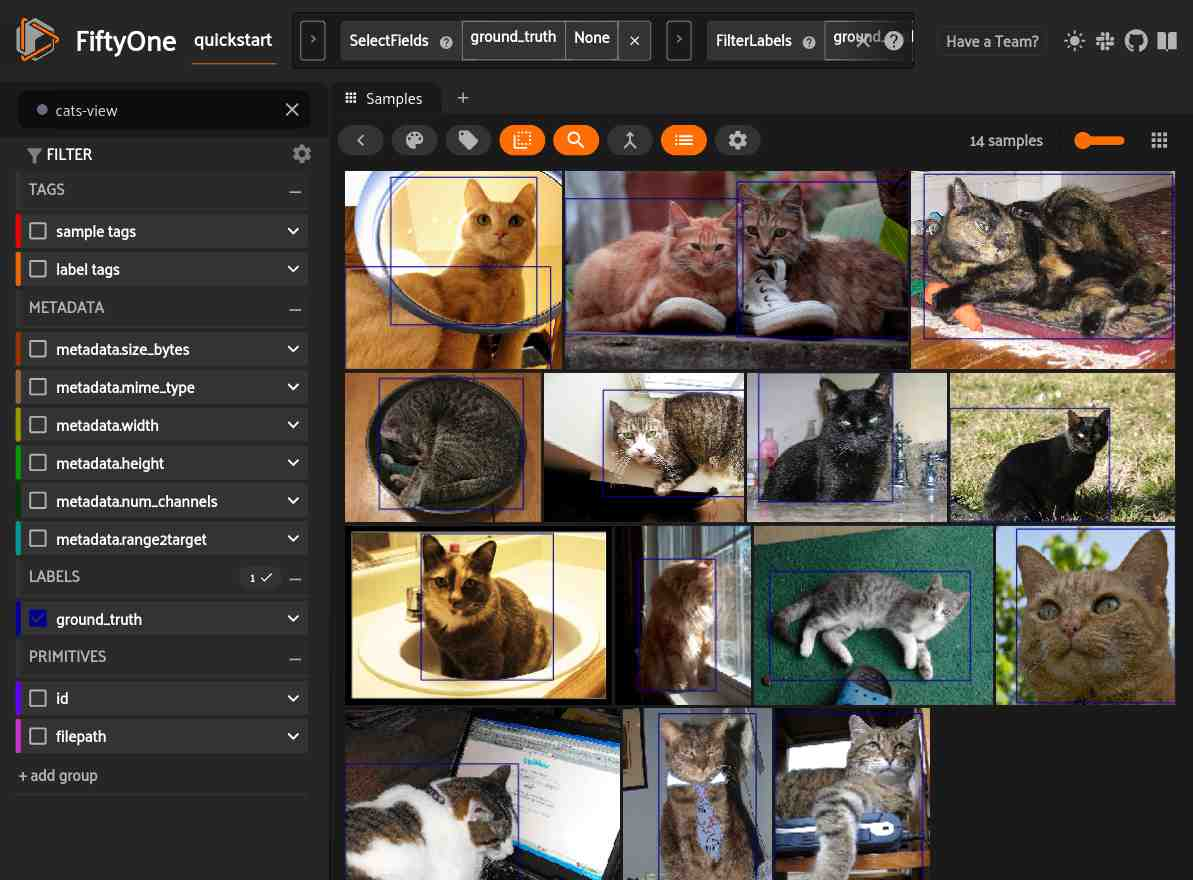

In [108]:
# Show the samples we processed in rank order by the mistakenness
session1.view = mistake_view
session1.show()

In [78]:
from fiftyone import ViewField as F

session1.view = dataset.filter_labels("ground_truth", F("mistakenness") > 0.95)

Aggregations, see https://docs.voxel51.com/user_guide/using_aggregations.html

In [80]:
# List available aggregations
print(dataset.list_aggregations())

['bounds', 'count', 'count_values', 'distinct', 'histogram_values', 'mean', 'quantiles', 'schema', 'list_schema', 'std', 'sum', 'values']


In [81]:
counts = dataset.count_values("ground_truth.detections.label")
print(counts) 

{'scissors': 1, 'bear': 6, 'chair': 23, 'pizza': 9, 'bottle': 10, 'horse': 17, 'fire hydrant': 2, 'hot dog': 5, 'dog': 15, 'fork': 9, 'train': 5, 'toothbrush': 2, 'boat': 37, 'knife': 9, 'cake': 4, 'skateboard': 3, 'refrigerator': 3, 'book': 11, 'orange': 2, 'donut': 13, 'bench': 23, 'giraffe': 23, 'cat': 16, 'backpack': 7, 'bird': 51, 'motorcycle': 19, 'apple': 2, 'sink': 5, 'zebra': 14, 'baseball glove': 4, 'umbrella': 23, 'surfboard': 30, 'traffic light': 24, 'skis': 8, 'teddy bear': 1, 'banana': 3, 'bowl': 15, 'sandwich': 6, 'laptop': 4, 'broccoli': 16, 'sheep': 2, 'couch': 4, 'parking meter': 1, 'dining table': 15, 'cup': 21, 'tie': 6, 'wine glass': 4, 'carrot': 47, 'tennis racket': 2, 'cow': 22, 'snowboard': 2, 'elephant': 17, 'person': 378, 'clock': 4, 'stop sign': 2, 'frisbee': 2, 'truck': 19, 'bed': 1, 'airplane': 24, 'sports ball': 3, 'microwave': 1, 'cell phone': 1, 'handbag': 15, 'spoon': 9, 'oven': 2, 'bus': 1, 'car': 61, 'kite': 75, 'tv': 1, 'suitcase': 9, 'vase': 1}


In [93]:
dataset.bounds("uniqueness")

(0.15001302256126986, 1.0)

In [94]:
dataset.distinct("tags")

['validation']

In [95]:
dataset.distinct("predictions.detections.label")

['airplane',
 'apple',
 'backpack',
 'banana',
 'baseball glove',
 'bear',
 'bed',
 'bench',
 'bicycle',
 'bird',
 'boat',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'bus',
 'cake',
 'car',
 'carrot',
 'cat',
 'cell phone',
 'chair',
 'clock',
 'couch',
 'cow',
 'cup',
 'dining table',
 'dog',
 'donut',
 'elephant',
 'fire hydrant',
 'fork',
 'frisbee',
 'giraffe',
 'hair drier',
 'handbag',
 'horse',
 'hot dog',
 'keyboard',
 'kite',
 'knife',
 'laptop',
 'microwave',
 'motorcycle',
 'mouse',
 'orange',
 'oven',
 'parking meter',
 'person',
 'pizza',
 'potted plant',
 'refrigerator',
 'remote',
 'sandwich',
 'scissors',
 'sheep',
 'sink',
 'skateboard',
 'skis',
 'snowboard',
 'spoon',
 'sports ball',
 'stop sign',
 'suitcase',
 'surfboard',
 'teddy bear',
 'tennis racket',
 'tie',
 'toaster',
 'toilet',
 'toothbrush',
 'traffic light',
 'train',
 'truck',
 'tv',
 'umbrella',
 'vase',
 'wine glass',
 'zebra']

In [82]:
# Expression that computes the number of predicted objects
num_objects = F("predictions.detections").length()

In [92]:
# The `(min, max)` number of predictions per sample
print(dataset.bounds(num_objects))

(1, 100)


In [99]:
# Compute quantiles of detection confidence in the `predictions` field
quantiles = dataset.quantiles(
    "predictions.detections.confidence",
    [0.25, 0.5, 0.75, 0.9],
)
print(quantiles)

[0.09230882674455643, 0.2025071531534195, 0.5627268552780151, 0.9435436725616455]


<b> Dataset Views, see https://docs.voxel51.com/user_guide/using_views.html

In [111]:
view = dataset.view() # whole dataset
print(len(view))

# Take 5 random samples from the dataset
view1 = dataset.take(5)
print(len(view1))

200
5


In [103]:
# Use view to iterate samples 
for sample in view:
    # Do something with `sample`
    pass
sample = view.take(1).first()
same_sample = view[sample.id]
also_same_sample = view[sample.filepath]


In [114]:
# Filtering 
# Samples whose image is less than 48 KB
small_images_view = dataset.match(F("metadata.size_bytes") < 48 * 1024)

# Samples that contain at least one prediction with confidence above 0.99
# or whose label ifs "cat" or "dog"
match = (F("confidence") > 0.99) & (F("label").is_in(("cat", "dog")))
matching_view = dataset.match(
    F("predictions.detections").filter(match).length() > 0
)

In [125]:
session2 = fo.launch_app(matching_view, auto=False, desktop=False)
session2.show()

Session launched. Run `session.show()` to open the App in a cell output.


In [110]:
dataset.persistent = True 
# Create a view
cats_view = (
    dataset
    .select_fields("ground_truth")
    .filter_labels("ground_truth", F("label") == "cat")
    .sort_by(F("ground_truth.detections").length(), reverse=True)
)

# Save the view
dataset.save_view("cats-view", cats_view)

# ..next week..

# Retrieve a saved view
cats_view = dataset.load_saved_view("cats-view")

In [109]:
dataset.delete_saved_view("cats-view")

In [116]:
#add tags via views 
# Perform a random 90-10 test-train split
dataset.persistent = False
dataset.take(0.1 * len(dataset)).tag_samples("test")
dataset.match_tags("test", bool=False).tag_samples("train")

<B> Plugins
https://github.com/voxel51/fiftyone-plugins

In [124]:
!fiftyone plugins download https://github.com/jacobmarks/zero-shot-prediction-plugin
!fiftyone plugins download https://github.com/jacobmarks/image-quality-issues
!fiftyone plugins download \
    https://github.com/voxel51/fiftyone-plugins \
    --plugin-names @voxel51/brain
!fiftyone plugins download https://github.com/allenleetc/model-comparison
!fiftyone plugins download \
    https://github.com/voxel51/fiftyone-plugins \
    --plugin-names @voxel51/io

  115.2Kb [71.3ms elapsed, ? remaining, 1.6Mb/s]   
Skipping existing plugin '@jacobmarks/zero_shot_prediction'
  189.3Kb [66.0ms elapsed, ? remaining, 2.8Mb/s]   
Skipping existing plugin '@jacobmarks/image_issues'
  329.1Mb [13.6s elapsed, ? remaining, 21.1Mb/s]   
Skipping existing plugin '@voxel51/brain'
Plugins not found: {'@voxel51/brain'}
   87.1Kb [61.3ms elapsed, ? remaining, 1.4Mb/s]   
Skipping existing plugin '@allenleetc/model_comparison'
  329.1Mb [15.4s elapsed, ? remaining, 23.2Mb/s]   
Copying plugin '@voxel51/io' to '/home/borisef/fiftyone/__plugins__/@voxel51/io'


RUN DETECTION MODEL (see https://docs.voxel51.com/recipes/adding_detections.html)